In [1]:
#Importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

## What is a binary classification?
Classifying a data with multiple features into a target variable with two categories or classes is the binary classification.

For example, the dataset which we are going to use has 4 features and 1 target variable that can take two values 0 and 1. Lets visualize it.

In [2]:
# reading the csv file, del 2 columns from the file, checking first few rows of the file
data = pd.read_csv('../input/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


We can understand that dataset is about using 4 features UserID, Age, gender, Estimated Salary we are given whether a user is purchasing an item or not. Since purchasing has no relation to UserID and also gender has almost no role, we can simply drop them.

In [3]:
data.drop(columns=['User ID','Gender',],axis=1,inplace=True)
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Let's visualize a scatter plot of the modified data.

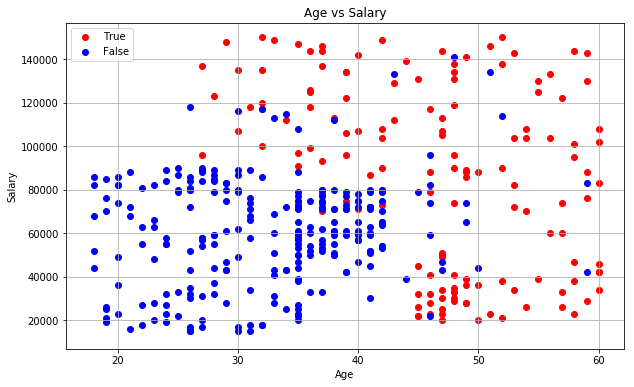

In [4]:
ages = data['Age']
salaries = data['EstimatedSalary']
true_false_values = data['Purchased'].astype(bool)

# Step 3: Plot Data
plt.figure(figsize=(10, 6))

# Plot true values in red and false values in blue
plt.scatter(ages[true_false_values], salaries[true_false_values], color='red', label='True')
plt.scatter(ages[~true_false_values], salaries[~true_false_values], color='blue', label='False')

plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')

plt.legend()
plt.grid(True)
plt.show()

Visualizing target variable purchased or not with respect to independent variable Estimated salary

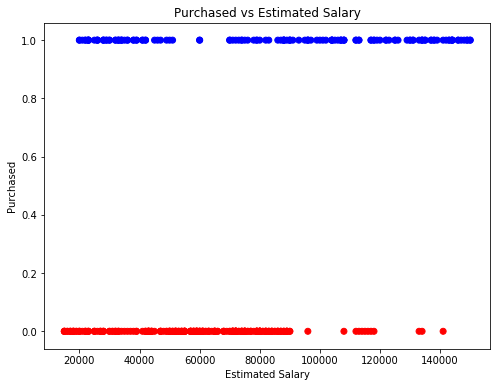

In [5]:
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame
salaries = data['EstimatedSalary']
true_false_values = data['Purchased'].astype(bool)

# Plot Purchased against EstimatedSalary
plt.figure(figsize=(8, 6))
plt.scatter(salaries, true_false_values, color=['blue' if val else 'red' for val in true_false_values])
plt.xlabel('Estimated Salary')
plt.ylabel('Purchased')
plt.title('Purchased vs Estimated Salary')
plt.show()


Now lets try linear regression on it

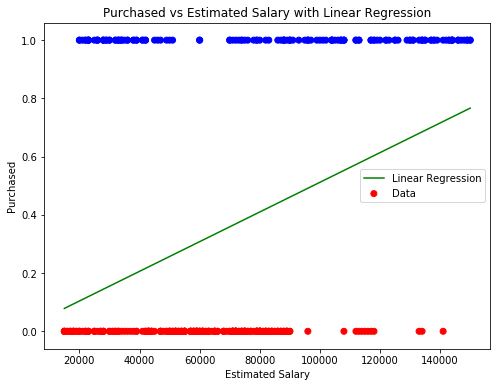

In [6]:
from sklearn.linear_model import LinearRegression
salaries = data['EstimatedSalary'].values.reshape(-1, 1)
true_false_values = data['Purchased'].astype(bool)

# Fit a linear regression model
model = LinearRegression()
model.fit(salaries, true_false_values)

# Predict the probabilities
salaries_range = np.linspace(min(salaries), max(salaries), 100).reshape(-1, 1)
probabilities = model.predict(salaries_range)

# Plot Purchased against EstimatedSalary
plt.figure(figsize=(8, 6))
plt.scatter(salaries, true_false_values, color=['blue' if val else 'red' for val in true_false_values], label='Data')
plt.plot(salaries_range, probabilities, color='green', label='Linear Regression')
plt.xlabel('Estimated Salary')
plt.ylabel('Purchased')
plt.title('Purchased vs Estimated Salary with Linear Regression')
plt.legend()
plt.show()


The linear regression above does not fulfill our aim even if we use threshold (mostly 0.5 for binary classification) because 
* Linear regression predicts or works on continuous data while our target variable is discrete.
* It faces the issue of outliers like independent variable getting out of range.

What is the solution of the problem?

If we can bend the outliers or the endings of the regression line almost in a straight line (generating a s-shaped function) since our target is binary then we can achieve the prediction of our target. 

Such a function is the sigmoid function.
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$
where x is any independent variable or feature. It will make sure that output for any value of x will lie between 0 and 1.


Suppose the linear regression line is
$$
h(x) = b_0 + b_1 \times x
$$
Then the hypothesis with sigmoid will be
$$
h(x) = \frac{1}{1 + e^{-(b_0 + b_1x)}}
$$
This transformed function now becomes the hypothesis for what we call as **Logistic Regression**. So we can call logistic regression as the brother of linear regression with the difference of application.


![](https://miro.medium.com/v2/resize:fit:828/format:webp/1*DXKO2GGT0XT_6JFjROajvg.gif)

Now, we will define all the above readings in the code after performing some data preprocessing.

In [7]:
#Declaring X as all columns excluding last
X = data.iloc[:,:-1].values

In [8]:
#Declare label as last column in the source file
y = data.iloc[:,-1].values

In [9]:
# splitting the data to test whether our hypothesis works or not
# Splitting data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
# Scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Here beginning with the variable declaration of the sigmoid function

In [11]:
#Variabes to calculate sigmoid function
y_pred = [] #value of h(x)
len_x = len(X_train[0]) #number of features
w = [] #value of the coefficients also called as weights of the linear regression line
for weights in range(len_x):
    w.append(0)
b = 0.2 # bias or intercept
entries = len(X_train[:,0])

The sigmoid function

In [12]:
# Sigmoid function
def sigmoid(z):
    return (1/(1+np.exp(-z)))

Predict function or the hypothesis function h(x)

In [13]:

def predict(inputs):
    z = np.dot(w,inputs)+b
    a = sigmoid(z)
    return a

Our hypothesis may be correct or may be not, so we will define a loss function.

The likelihood function represents the probability of observing the given labels \( y \) given the input features \( X \) and the parameters w (denoted by theta) or weights. For binary classification, it's defined as:
$$
L(\theta) = \prod_{i=1}^{m} h_\theta(x^{(i)})^{y^{(i)}} \cdot (1 - h_\theta(x^{(i)}))^{1 - y^{(i)}}
$$
Where:
- \( m \) is the number of training examples.
- \( x^{(i)} \) is the feature vector of the \( i \)-th training example.
- \( y^{(i)} \) is the actual label of the \( i \)-th training example.

Taking the logarithm of the likelihood function (log-likelihood) makes it easier to work with:
$$
\ell(\theta) = \log L(\theta) = \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

The negative of the log-likelihood function gives us the cost function J(w), which we want to minimize:
$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

In [14]:
#Loss function
def loss_func(y,a):
    J = -(y*np.log(a) + (1-y)*np.log(1-a))
    return J         

Now we need to minimize this cost function.
For this we can use gradient descent method where  we need to update the parameters 𝜃 or w (weights) iteratively in the opposite direction of the gradient of the cost function. 

Let us the look into the effect of choosing learning rate alpha in our minimization of loss for which we are using gradient descent method.

Creating test and training dataset for getting the plot of accuarcy vs alpha from 0.05 to 0.2. 

In [15]:
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y, test_size = 0.25, random_state = 1)
X_train_temp = sc.fit_transform(X_train_temp)
X_test_temp = sc.transform(X_test_temp)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


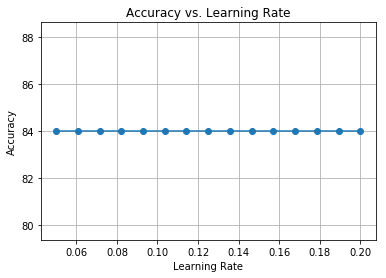

In [30]:
learning_rates = []
accuracies = []
learning_rate_range = np.linspace(0.05, 0.2, 15)

for alpha in learning_rate_range:
    # Reset weights and biases for each learning rate
    weights = np.zeros(len_x)
    bias = 0
    
    # Reset dw, db, and loss
    gradient_weights = np.zeros(len_x)
    gradient_bias = 0
    loss = 0
    
    for iteration in range(1000):
        
        for i in range(entries):
            # storing features info of current training example
            features = X_train_temp[i]
            # prediction by hypothesis function
            prediction = predict(features)   
            # error
            error = prediction - y_train_temp[i]
            # adding cost of the current training example
            loss += loss_func(y_train_temp[i], prediction)
            for j in range(len_x):
                # gradient of loss with respect to each weight
                gradient_weights[j] += features[j] * error
            # gradient of loss with respect to bias
            gradient_bias += error
        
        # averaging all the parameters
        loss = loss / entries
        gradient_bias = gradient_bias / entries
        for x in range(len_x):
            gradient_weights[x] = gradient_weights[x] / entries
            weights[x] = weights[x] - (alpha * gradient_weights[x])
        bias = bias - (alpha * gradient_bias)      
        
        # Resetting loss to 0 for next iteration
        loss = 0
        
    # Calculate accuracy after training with current learning rate
    predictions_temp = []
    for x in range(len(y_test_temp)):
        predictions_temp.append(predict(X_test_temp[x]))
    
    # Calculate accuracy of prediction
    count = 0
    for x in range(len(predictions_temp)):
        if(predictions_temp[x]>=0.5):
            predictions_temp[x]=1
        else :
            predictions_temp[x]=0
        if(predictions_temp[x]==y_test_temp[x]):
            count=count+1
    accuracy = count/(len(predictions_temp))*100
    accuracies.append(accuracy)
    learning_rates.append(alpha)

# Plot the graph
plt.plot(learning_rates, accuracies, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Learning Rate')
plt.grid(True)
plt.show()


We can see from the above plot that learning rate did not made any change to the accuracy of predictions. The reason can be that the gradient descent has reached the minima of cost and achieved the best accuracy for logistic regression on this dataset.

Initializing the parameters weights, bias, cost and learning rate.

In [17]:
dw = []
db = 0
J = 0
alpha = 0.1
for x in range(len_x):
    dw.append(0)

In [18]:

loss_vector=[]
for iterations in range(1000):
    for i in range(entries):
        # storing features info of current training example
        localx = X_train[i]
        # prediction by hypothesis function
        a = predict(localx)   
        # error
        dz = a - y_train[i]
        # adding cost of the current training example
        J += loss_func(y_train[i],a)
        for j in range(len_x):
            # gradient of loss with respect to each weight
            dw[j] = dw[j]+(localx[j]*dz)
        # gradient of loss with repect to bias
        db += dz
    # averaging all the parameters
    J = J/entries
    loss_vector.append(J)
    db = db/entries
    for x in range(len_x):
        dw[x]=dw[x]/entries
    for x in range(len_x):
        w[x] = w[x]-(alpha*dw[x])
    b = b-(alpha*db)      
    # resetting loss to 0 for next iteration
    J=0

Let us see whether loss converged or not.

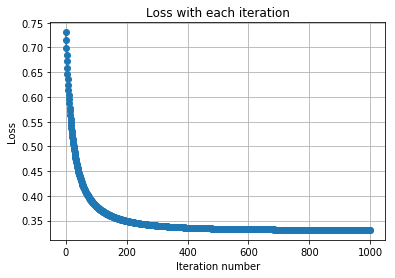

In [29]:
plt.plot(range(1000), loss_vector, marker='o')
plt.xlabel('Iteration number')
plt.ylabel('Loss')
plt.title('Loss with each iteration')
plt.grid(True)
plt.show()

We can see it converged.

We finally get weights w0, w1

In [20]:
#Print weight
print(w)

[2.3999548361765717, 1.4682683184129512]


The value of intercept

In [21]:
#print intercept
print(b)

-1.301195380240508


Decision boundary from logistic regression function implemented above on Training dataset.

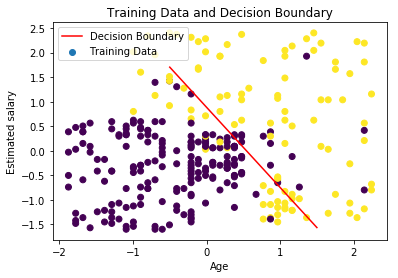

In [22]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, label='Training Data')
x_values = np.linspace(-0.5, 1.5, 100)
y_values = -(w[0] * x_values + b) / w[1]
plt.plot(x_values, y_values, color='red', label='Decision Boundary')
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.title('Training Data and Decision Boundary')
plt.legend()
plt.show()

Decision boundary from logistic regression function implemented above on Test dataset.

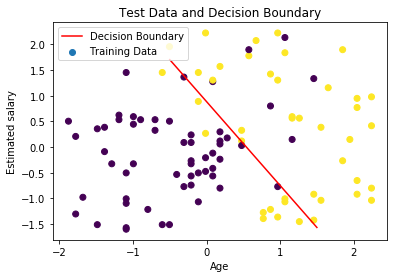

In [23]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label='Training Data')
x_values = np.linspace(-0.5, 1.5, 100)
y_values = -(w[0] * x_values + b) / w[1]
plt.plot(x_values, y_values, color='red', label='Decision Boundary')
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.title('Test Data and Decision Boundary')
plt.legend()
plt.show()

In [24]:
#predicting the label
y_pred = []
for x in range(len(y_test)):
    y_pred.append(predict(X_test[x]))

In [25]:
#print actual and predicted values in a table
for x in range(len(y_pred)):
    print('Actual ',y_test[x],' Predicted ',y_pred[x])
    if y_pred[x]>=0.5:
        y_pred[x]=1
    else:
        y_pred[x]=0

Actual  0  Predicted  0.04169112420487563
Actual  0  Predicted  0.229663897302998
Actual  1  Predicted  0.6374579071751488
Actual  1  Predicted  0.809155355004841
Actual  0  Predicted  0.14315535241995733
Actual  0  Predicted  0.21900127102627767
Actual  0  Predicted  0.0011461510769275726
Actual  1  Predicted  0.9138859819645884
Actual  0  Predicted  0.0069328724932849585
Actual  0  Predicted  0.9877478291424452
Actual  0  Predicted  0.1291693600799547
Actual  0  Predicted  0.33448573912503526
Actual  0  Predicted  0.1580305029463399
Actual  1  Predicted  0.9811926453970629
Actual  1  Predicted  0.9525226314975321
Actual  1  Predicted  0.9973339843479853
Actual  1  Predicted  0.9908965148193426
Actual  0  Predicted  0.015289525514026027
Actual  0  Predicted  0.06490507630282424
Actual  1  Predicted  0.995997555012235
Actual  0  Predicted  0.4096148629122601
Actual  1  Predicted  0.9278337877898936
Actual  1  Predicted  0.966470141200042
Actual  0  Predicted  0.4723688904290328
Actual 

In [26]:
# Calculating accuracy of prediction
count = 0
for x in range(len(y_pred)):
    if(y_pred[x]==y_test[x]):
        count=count+1
print('Accuracy:',(count/(len(y_pred)))*100)

Accuracy: 84.0


In [27]:
#Adding the code for confusion matrix which is the best model performace measure for Classification Algorithms
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[52  6]
 [10 32]]


Classification using inbuilt Logistic Regression from sklearn library.

Accuracy: 0.84


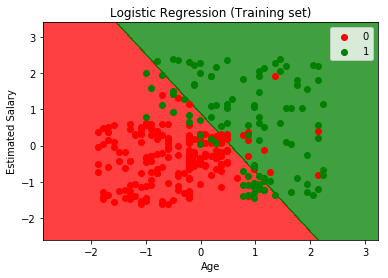

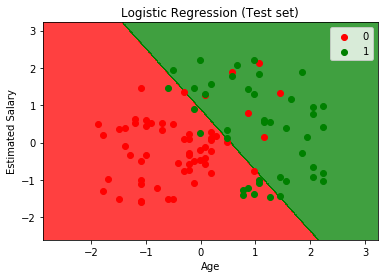

In [28]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

classifierLR = LogisticRegression(random_state = 0)
classifierLR.fit(X_train, y_train)

#predicting the test label with LR. Predict always takes X as input
y_predLR=classifierLR.predict(X_test)

accuracy = accuracy_score(y_test, y_predLR)
print("Accuracy:", accuracy)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifierLR.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifierLR.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()